In [25]:
import facebook
import requests
# from json import dump
# import time
import csv
import numpy as np
import sys
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
# Authentication
ACCESS_TOKEN = 'EAAGXikZCCy0sBAH775J7FeTYYPZC9otg766gY4pENhREFgKbCpvKgVzkrcza5ZCM8ncZAWNTwmnDi6ZCqOZAqNZAOCmT8u6pTZAum2Dbh5RAEUPuZB70auwCNSBUWESb7et4sx6Qbd7CFUvR2T3sgh6K2jEx6ZB8rvuFFKaAMPZBq9ZCF0TE3FMZCupOPc70WP8ZAFhfpArq8kfbKwJQZDZD'

# GET requests in FB me?fields=ratings
URL = f"https://graph.facebook.com/v8.0/me?fields=ratings&access_token={ACCESS_TOKEN}"

In [55]:
data = []
r = requests.get(URL)  # Make a GET request to the given URL
data.append(r.json())  # Extract data in the json form and append it into the list named "data"
count = pos = neg = neut = 0

if 'Error' in data[0].keys() or 'error' in data[0].keys():
    print('Error Occured!')
    print(data[0]['error']['message'])
    sys.exit(0)
try:    
    with open('FBdata.csv', mode='w', encoding="utf-8", newline='') as file:
        writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        writer.writerow(['created_time', 'recommendation_type', 'review_text'])
        for i in data[0]['ratings']['data']:
            writer.writerow([i['created_time'], i['recommendation_type'], i['review_text']])
            if i['recommendation_type'] == "positive":
                pos +=1
            if i['recommendation_type'] == "negative":
                neg +=1
            if i['recommendation_type'] == "neutral":
                neut +=1
            count +=1
            print(count, pos, neg, neut,[i['created_time'], i['recommendation_type'], i['review_text']])
except Exception as e:
    print('Error in writing...')
    print(e)

1 1 0 0 ['2020-11-03T16:53:35+0000', 'positive', 'Great photos and websites!']
2 2 0 0 ['2020-01-19T21:19:10+0000', 'positive', 'Amazing shots! Highly recommend!']


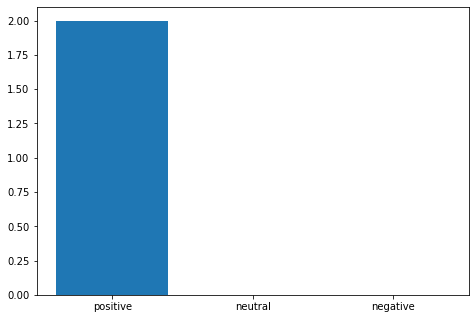

In [63]:
# Plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sentiment = ["positive", "neutral", "negative"]
values = [pos, neut, neg]
ax.bar(sentiment, values)
plt.show()